In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from numpy import nan


In [26]:
midwest_data = pd.read_csv('MidwestMurderData.csv')
midwest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145080 entries, 0 to 145079
Data columns (total 32 columns):
ID              145080 non-null object
CNTYFIPS        145080 non-null object
Ori             145080 non-null object
State           145080 non-null object
Agency          145080 non-null object
Agentype        145080 non-null object
Source          145080 non-null object
Solved          145080 non-null object
Year            145080 non-null int64
StateName       145080 non-null object
Month           145080 non-null object
Incident        145080 non-null int64
ActionType      145080 non-null object
Homicide        145080 non-null object
Situation       145080 non-null object
VicAge          145080 non-null int64
VicSex          145080 non-null object
VicRace         145080 non-null object
VicEthnic       145080 non-null object
OffAge          145080 non-null int64
OffSex          145080 non-null object
OffRace         145080 non-null object
OffEthnic       145080 non-null obj

In [27]:
print('Homocide:', midwest_data[midwest_data.Homicide == 'Murder and non-negligent manslaughter'].ID.count())
print('Negligent manslaughter:', midwest_data[midwest_data.Homicide != 'Murder and non-negligent manslaughter'].ID.count())

Homocide: 143188
Negligent manslaughter: 1892


In [28]:
# Offender count by gender
print('Male offender count is:',midwest_data['OffSex'].value_counts()['Male'])
print('Female offender count is:',midwest_data['OffSex'].value_counts()['Female'])
print('Unknown offender count is:',midwest_data['OffSex'].value_counts()['Unknown'])


Male offender count is: 87750
Female offender count is: 12146
Unknown offender count is: 45184


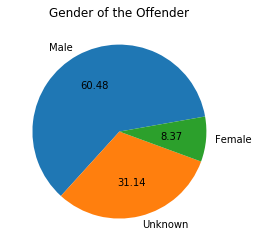

In [29]:
offender_gender = pd.DataFrame(midwest_data, columns = ['OffSex']) 
count_offender_gender = offender_gender.stack().value_counts()
ax = count_offender_gender.plot(kind = 'pie',
                              title = 'Gender of the Offender',
                              startangle = 10,
                              autopct='%.2f')
ax.set_ylabel('')
plt.show()

In [30]:
#Victim count by gender
print('Male victim count is:',midwest_data['VicSex'].value_counts()['Male'])
print('Female victim count is:',midwest_data['VicSex'].value_counts()['Female'])
print('Unknown victim count is:',midwest_data['VicSex'].value_counts()['Unknown'])

Male victim count is: 111465
Female victim count is: 33402
Unknown victim count is: 213


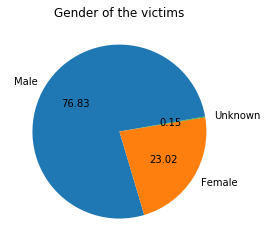

In [31]:
gender = pd.DataFrame(midwest_data, columns = ['VicSex']) 
count_gender = gender.stack().value_counts()
ax = count_gender.plot(kind = 'pie',
                              title = 'Gender of the victims',
                              startangle = 10,
                              autopct='%.2f')
ax.set_ylabel('')
plt.show()

In [32]:
# Solved vs unsolved crime
print('Unsolved:', midwest_data[midwest_data.Solved == 'No'].ID.count())
print('Solved:', midwest_data[midwest_data.Solved == 'Yes'].ID.count())

Unsolved: 45193
Solved: 99887


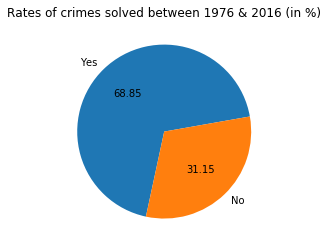

In [33]:
solved = pd.DataFrame(midwest_data, columns = ['Solved']) 
resolution = solved.stack().value_counts()
ax = resolution.plot(kind = 'pie',
                              title = 'Rates of crimes solved between 1976 & 2016 (in %)',
                              startangle = 10,
                              autopct='%.2f')
ax.set_ylabel('')
plt.show()

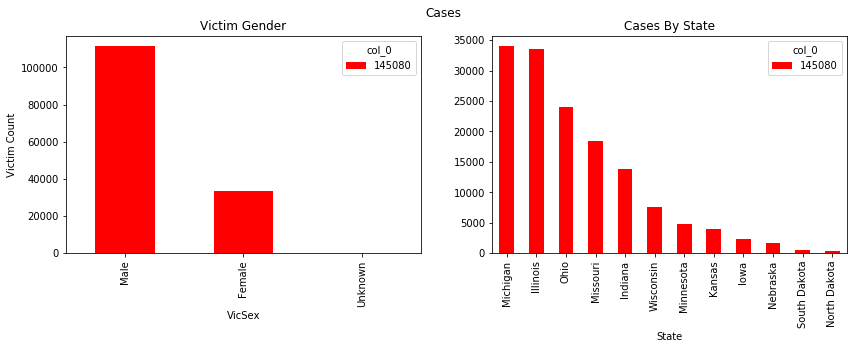

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

#
ax = (pd.crosstab(midwest_data.VicSex,len(midwest_data.VicSex)).sort_values(len(midwest_data.VicSex), ascending=False).plot(kind='bar', color='red', title='Victim Gender',ax=axes[0]))

fig.suptitle('Cases')
ax.set_ylabel('Victim Count')
# Cases per state
ax = (pd.crosstab(midwest_data.State,len(midwest_data.State))
        .sort_values(len(midwest_data.State), ascending=False)
        .plot(kind='bar', color= 'red',title ='Cases By State', ax=axes[1]))

                                                                                                  

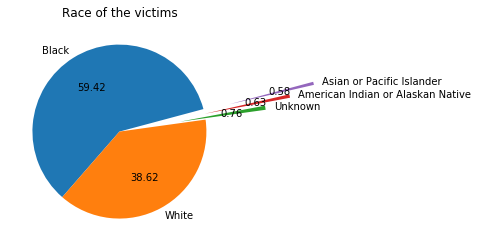

In [35]:
race = pd.DataFrame(midwest_data, columns = ['VicRace']) 
victim_race = race.stack().value_counts()
ax = victim_race.plot(kind = 'pie',
                              title = 'Race of the victims',
                              startangle = 15,
                              autopct='%.2f',
                              explode=(0, 0, 0.7, 1, 1.3))
ax.set_ylabel('')
plt.show()

In [36]:

victim_group = midwest_data.groupby('Month')


# Count how many times each victim appears in our group
vic_count = victim_group['VicCount'].count()

vic_count

Month
April        11420
August       13515
December     12133
February     10187
January      11754
July         13625
June         12251
March        11521
May          11956
November     11658
October      12287
September    12773
Name: VicCount, dtype: int64

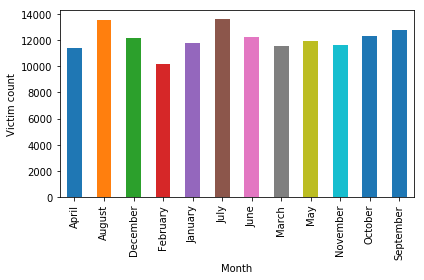

In [37]:
#vic_count = pd.DataFrame(midwest_data.Month,len(midwest_data.Month)).sort_values(len(midwest_data.Month), ascending=False).plot(kind='bar', title= 'Homicide per month', ax=axes[0]))
vic_count = vic_count.plot(kind='bar')#sort_v
#alues("Month"), ascending=False
x_axis = np.arange(1,13,1)
x_axis
# Set the xlabel and ylabel using class methods
vic_count.set_xlabel("Month")
vic_count.set_ylabel("Victim count")


plt.tight_layout()

In [38]:
crimefile = []
for col in midwest_data.columns.values:
    if len(set(midwest_data[col])) < 50:
        print(col, set(midwest_data[col]))
        crimefile.append(col)
        
print(crimefile)

State {'Minnesota', 'Wisconsin', 'Nebraska', 'North Dakota', 'Indiana', 'Illinois', 'Ohio', 'Michigan', 'South Dakota', 'Kansas', 'Missouri', 'Iowa'}
Agentype {'Tribal', 'Primary state LE', 'Special police', 'County police', 'Regional police', 'Sheriff', 'Municipal police'}
Source {'FBI', 'MAP'}
Solved {'Yes', 'No'}
Year {1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017}
StateName {'MINN', 'IOWA', 'NEBR', 'WIS', 'OHIO', 'MICH', 'ILL', 'KANS', 'S DAK', 'IND', 'N DAK', 'MO'}
Month {'October', 'May', 'February', 'January', 'July', 'June', 'August', 'March', 'April', 'December', 'November', 'September'}
ActionType {'7', 'Adjustment', '3', 'Normal update', '4', '5', '2', '6', '8', '9'}
Homicide {'Manslaughter by negligence', 'Murder and non-negligent manslaughter'}
Situation {'Single victim/s

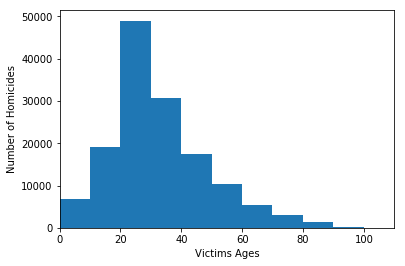

In [39]:
age = plt.hist(midwest_data['VicAge'],bins=100)
plt.xlabel('Victims Ages')
plt.ylabel('Number of Homicides');
age = plt.xlim(0,110)


plt.show()